# ReEDS Scenarios on PV ICE Tool USA

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. ReEDS installation projections are used in this journal as input data to the PV ICE tool. 

Current sections include:

<ol>
    <li> ### Reading a standard ReEDS output file and saving it in a PV ICE input format </li>
<li>### Reading scenarios of interest and running PV ICE tool </li>
<li>###Plotting </li>
<li>### GeoPlotting.</li>
</ol>
    Notes:
   
Scenarios of Interest:
	the Ref.Mod, 
o	95-by-35.Adv, and 
o	95-by-35+Elec.Adv+DR ones


In [1]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'TEMP' / 'Solar_Futures')
inputfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'TEMP')
print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\Solar_Futures


In [3]:
if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [4]:
PV_ICE.__version__

'v0.2.0+71.g10422ca.dirty'

### Create Scenarios in PV_ICE

#### Rename difficult characters from Scenarios Names

In [5]:
scenarios = ['Reference.Mod',
 'Reference.Adv',
 'Reference.Adv_DR',
 '95-by-35.Mod',
 '95-by-35.Adv',
 '95-by-35.Adv_DR',
 '95-by-35_Elec.Mod',
 '95-by-35_Elec.Adv',
 '95-by-35_Elec.Adv_DR']

#### Downselect to Solar Future scenarios of interest

Scenarios of Interest:
<li> Ref.Mod
<li> 95-by-35.Adv  
<li> 95-by-35+Elec.Adv+DR 

In [6]:
#SFscenarios = [simulationname[0], simulationname[4], simulationname[8]]
SFscenarios = ['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']
SFscenarios

['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']

#### Create the 3 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [7]:
MATERIALS = ['glass', 'silicon', 'silver','copper','aluminium','backsheet','encapsulant']

# rr - baseline, no circularity
# r1 - Perfect MFG, no circularity
# r2 - Irena EL
# r3 - Irena RL

In [8]:
i = 0
rr = PV_ICE.Simulation(name='USA', path=testfolder)
for i in range(0, 3):
    filetitle = SFscenarios[i]+'.csv'
    filetitle = os.path.join(inputfolder, 'USA', filetitle)    
    rr.createScenario(name=SFscenarios[i], file=filetitle)
    rr.scenario[SFscenarios[i]].addMaterials(MATERIALS, baselinefolder=r'..\..\baselines\SolarFutures_2021', nameformat=r'\baseline_material_{}_Reeds.csv')
rr.scenMod_noCircularity()

path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\Solar_Futures


In [9]:
i = 0
r1 = PV_ICE.Simulation(name='PerfectMFG', path=testfolder)
for i in range(0, 3):
    filetitle = SFscenarios[i]+'.csv'
    filetitle = os.path.join(inputfolder, 'USA', filetitle)    
    r1.createScenario(name=SFscenarios[i], file=filetitle)
    r1.scenario[SFscenarios[i]].addMaterials(MATERIALS, baselinefolder=r'..\..\baselines\SolarFutures_2021', nameformat=r'\baseline_material_{}_Reeds.csv')
r1.scenMod_PerfectManufacturing()
r1.scenMod_noCircularity()

i = 0
r2 = PV_ICE.Simulation(name='IrenaEL', path=testfolder)
for i in range(0, 3):
    filetitle = SFscenarios[i]+'.csv'
    filetitle = os.path.join(inputfolder, 'USA', filetitle)    
    r2.createScenario(name=SFscenarios[i], file=filetitle)
    r2.scenario[SFscenarios[i]].addMaterials(MATERIALS, baselinefolder=r'..\..\baselines\SolarFutures_2021', nameformat=r'\baseline_material_{}_Reeds.csv')
r2.scenMod_IRENIFY(ELorRL='EL')
r2.scenMod_noCircularity()

i = 0
r3 = PV_ICE.Simulation(name='IrenaRL', path=testfolder)
for i in range(0, 3):
    filetitle = SFscenarios[i]+'.csv'
    filetitle = os.path.join(inputfolder, 'USA', filetitle)    
    r3.createScenario(name=SFscenarios[i], file=filetitle)
    r3.scenario[SFscenarios[i]].addMaterials(MATERIALS, baselinefolder=r'..\..\baselines\SolarFutures_2021', nameformat=r'\baseline_material_{}_Reeds.csv')
r3.scenMod_IRENIFY(ELorRL='RL')
r3.scenMod_noCircularity()


path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\Solar_Futures
path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\Solar_Futures
Using Irena Early Loss Assumptions
path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\Solar_Futures
Using Irena Regular Loss Assumptions


In [10]:
rr.calculateMassFlow()
r1.calculateMassFlow()
r2.calculateMassFlow()
r3.calculateMassFlow()


Working on Scenario:  Reference.Mod
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium
==> Working on Material :  backsheet
==> Working on Material :  encapsulant
Working on Scenario:  95-by-35.Adv
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium
==> Working on Material :  backsheet
==> Working on Material :  encapsulant
Working on Scenario:  95-by-35_Elec.Adv_DR
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium
==> Working on Mater

In [11]:
"""
print("Scenarios:", rr.scenario.keys())
print("Module Keys:", rr.scenario[SFscenarios[0]].data.keys())
print("Material Keys: ", rr.scenario[SFscenarios[0]].material['glass'].materialdata.keys())
rr.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')
rr.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')
"""
pass

# Cumulative and Yearly Totals

In [12]:
USyearly, UScum = rr.aggregateResults()

# Data for Jarett

USyearly.to_csv('PV ICE US_Yearly NATION_tonnes.csv')
UScum.to_csv('PV ICE US_Cumulative NATION_tonnes.csv')

In [13]:
pvice_Usyearly0, pvice_Uscum0 = rr.aggregateResults()
pvice_Usyearly1, pvice_Uscum1 = r1.aggregateResults()
pvice_Usyearly2, pvice_Uscum2 = r2.aggregateResults()
pvice_Usyearly3, pvice_Uscum3 = r3.aggregateResults()
UScum = pd.concat([pvice_Uscum0, pvice_Uscum1, pvice_Uscum2, pvice_Uscum3], axis=1)
USyearly = pd.concat([pvice_Usyearly0, pvice_Usyearly1, pvice_Usyearly2, pvice_Usyearly3], axis=1)

UScum.to_csv('pvice_USCum.csv')
USyearly.to_csv('pvice_USYearly.csv')

#### 3 sig figures save Yearly and cumulative overview Nation

In [14]:
'''
USyearly3sig = USyearly.copy()
UScum3sig = UScum.copy()
N = 2

UScum3sig = UScum3sig.drop(UScum3sig.index[0])
USyearly3sig = USyearly3sig.drop(USyearly3sig.index[0])

if IRENA:
    UScum3sig = UScum3sig.loc[:, ~UScum3sig.columns.str.startswith('Waste_MFG_')]
    USyearly3sig = USyearly3sig.loc[:, ~USyearly3sig.columns.str.startswith('Waste_MFG_')]

USyearly3sig = USyearly3sig.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
USyearly3sig = USyearly3sig.applymap(lambda x: int(x))

UScum3sig = UScum3sig.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
UScum3sig = UScum3sig.applymap(lambda x: int(x))

USyearly3sig.to_csv(title_Method+' US_Yearly NATION_3sigs.csv')
UScum3sig.to_csv(title_Method+' US_Cumulative NATION_3sigs.csv')
''';

# PLOTS

# Figure 6. Annual material demands for PV manufacturing across scenarios, 2020–2050 

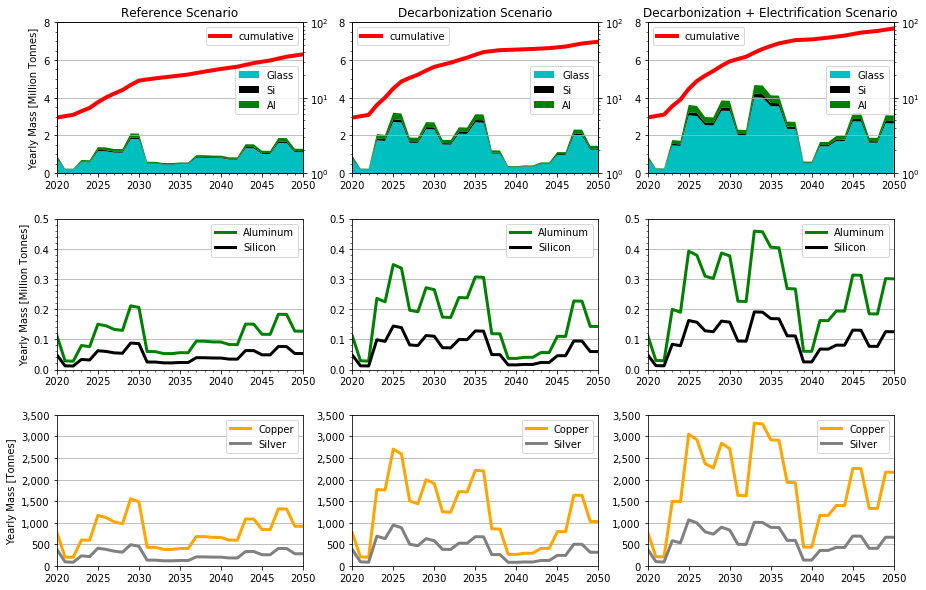

In [15]:
# FIGURE 4

import matplotlib as mpl

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium']

fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

titlesscens = ['Reference Scenario', 'Decarbonization Scenario', 'Decarbonization + Electrification Scenario']


for kk in range(0, 3):

    obj = SFscenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='c', alpha=0.5)
#    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
 #   axs[i].plot([],[],color='c', label='glass', linewidth=5)
 #   axs[i].plot([],[],color='k', label='silicon', linewidth=5)
 #   axs[i].plot([],[],color='m', label='silver', linewidth=5)
 #   axs[i].plot([],[],color='r', label='copper', linewidth=5)
 #   axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(rr.scenario[obj].data['year'], USyearly[keyw+materials[0]+'_USA_'+obj+'_[Tonnes]']/1e6, 
                                                      USyearly[keyw+materials[1]+'_USA_'+obj+'_[Tonnes]']/1e6,
                                                      USyearly[keyw+materials[4]+'_USA_'+obj+'_[Tonnes]']/1e6,
                                                      colors=['c','k','g'], labels=['Glass','Si','Al'])
    #USyearly[keyw+materials[2]+'_'+obj]/1e6, 
    #USyearly[keyw+materials[3]+'_'+obj]/1e6,
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    axs[i].set_title(titlesscens[kk])
    axs[i].legend(loc='center right',bbox_to_anchor=(1,0.55))

    #axs[i].legend(materials)

    i += 1 

# 2nd axis plot
i = 0
for kk in range(0, 3):

    obj = SFscenarios[kk]
    ax2=axs[i].twinx()
    
    module = (UScum[keyw+materials[0]+'_USA_'+obj+'_[Tonnes]']/1e6 + 
             UScum[keyw+materials[1]+'_USA_'+obj+'_[Tonnes]']/1e6 + 
             UScum[keyw+materials[2]+'_USA_'+obj+'_[Tonnes]']/1e6 +
             UScum[keyw+materials[3]+'_USA_'+obj+'_[Tonnes]']/1e6 +
             UScum[keyw+materials[4]+'_USA_'+obj+'_[Tonnes]']/1e6)
    ax2.plot(rr.scenario[obj].data['year'], module, 
             color = 'r', linewidth=4.0, label='cumulative')
    #axs[i].ylabel('Mass [Tons]')
 #   axs[i].set_xlim([2010, 2050])
  #  axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    ax2.set_yscale('log')
#    ax2.set_ylim([1e3/1e6, 1e8/1e6])
    ax2.set_ylim([1e0, 1e2])

    i += 1 

    ax2.legend()


i = 3
# ROW 2, Aluminum and Silicon:
# Loop over SF Scenarios
for kk in range(0, 3):


    obj = SFscenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)

    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[4]+'_USA_'+obj+'_[Tonnes]']/1e6, color='g', lw=3, label='Aluminum')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[4]+'_'+obj.name], 
 #                   color='g', lw=3, alpha=.6)
    
    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[1]+'_USA_'+obj+'_[Tonnes]']/1e6, color='k', lw=3, label='Silicon')
   # axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[1]+'_'+obj.name], 
   #                 color='k', lw=3)# alpha=.3)


    # silicon aluminum 'k ''g'
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    axs[i].legend()

    i += 1 



# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFscenarios[kk]
    axs[i].yaxis.grid()

    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[3]+'_USA_'+obj+'_[Tonnes]'], color='orange', lw=3, label='Copper')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[3]+'_'+obj.name], 
  #                  color='orange', lw=3)# alpha=.3)

    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[2]+'_USA_'+obj+'_[Tonnes]'], color='gray', lw=3, label='Silver')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[2]+'_'+obj.name], 
 #                   color='gray', lw=3)# , alpha=.6)
    
    
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    axs[i].legend()
    axs[i].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([0, 0.8e7/1e6])
    axs[i].minorticks_on()

    #a0.tick_params(axis='y', which='minor', bottom=False)
    #    axs[i].set_ylim([0, 1e7/1e6])
    
    axs[i+3].set_ylim([0, 0.5e6/1e6])
    axs[i+3].minorticks_on()

    axs[i+6].set_ylim([0, 3500])

    #axs[i+3].set_ylim([1e0, 10e8])
    #axs[i+6].set_ylim([1e0, 5e6])

#    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
#axs[5].legend(materials)
    
axs[0].set_ylabel('Yearly Mass [Million Tonnes]')
axs[3].set_ylabel('Yearly Mass [Million Tonnes]')
axs[6].set_ylabel('Yearly Mass [Tonnes]')

#axs[8].legend(materials)

fig.savefig('PV ICE SF Figure 4 - MaterialNeeds Nation.png', dpi=600)
plt.show()

## Figure 7. Percentage of 2020 global production of various materials needed to supply annual average virgin materials demand for c-Si PV

In [16]:
mining2020_aluminum = 65267000
mining2020_silver = 22260
mining2020_copper = 20000000
mining2020_silicon = 8000000

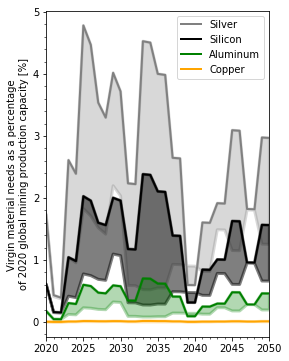

In [17]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
i = 0

obj = SFscenarios[2]
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')
axs.fill_between(USyearly.index, USyearly[keyw+materials[2]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_silver, 
                                 USyearly[keyw+materials[2]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silver,
                   color='gray', lw=3, alpha=.3)
    
axs.plot(USyearly[keyw+materials[1]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.fill_between(USyearly.index, USyearly[keyw+materials[1]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_silicon, 
                                USyearly[keyw+materials[1]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silicon,
                   color='k', lw=3, alpha=.5)

axs.plot(USyearly[keyw+materials[4]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')

axs.fill_between(USyearly.index, USyearly[keyw+materials[4]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_aluminum, 
                                USyearly[keyw+materials[4]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_aluminum,
                   color='g', lw=3, alpha=.3)


axs.plot(USyearly[keyw+materials[3]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.fill_between(USyearly.index, USyearly[keyw+materials[3]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_copper, 
                                USyearly[keyw+materials[3]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_copper,
                   color='orange', lw=3, alpha=.3)

axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')
axs.minorticks_on()

axs.set_ylabel('Virgin material needs as a percentage \nof 2020 global mining production capacity [%]')

fig.savefig('PV ICE Fig_1x1_MaterialNeeds Ratio to Production.png',  bbox_inches = "tight", dpi=600)

plt.show()

In [18]:
# Data for JARETT

keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium']

newdf = pd.DataFrame()


newdf['Silver_Ref'] = USyearly[keyw+materials[2]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_silver
newdf['Silver_High'] = USyearly[keyw+materials[2]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silver
                  
    
    
newdf['Silicon_Ref'] = USyearly[keyw+materials[1]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_silicon
newdf['Silicon_High'] = USyearly[keyw+materials[1]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silicon 
                  
    
newdf['Aluminium_Ref'] = USyearly[keyw+materials[4]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_aluminum
newdf['Aluminum_High'] = USyearly[keyw+materials[4]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_aluminum
                         
newdf['Copper_Ref'] = USyearly[keyw+materials[3]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_copper
newdf['Copper_High'] = USyearly[keyw+materials[3]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_copper

                        
newdf['Copper_Ref'] = USyearly[keyw+materials[3]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_copper
newdf['Copper_High'] = USyearly[keyw+materials[3]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_copper

newdf.to_csv('PV ICE Demand as Percentage of Mining.csv')



## Figure 19. Annual and cumulative PV EOL material mass by Solar Futures scenario through 2050

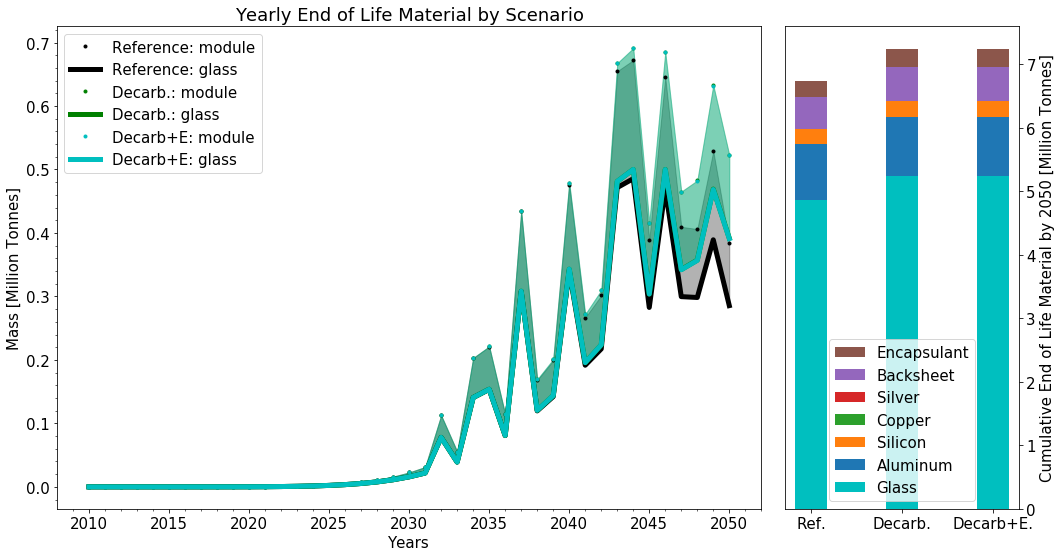

CUMULATIVE 2050 End of Life Material by Scenario
*************************
	 Reference:  6.74  Million Tonnes
	 Decarb:  7.24  Million Tonnes
	 Decarb+E:  7.24  Million Tonnes


In [83]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='WasteEOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################

foo = pd.DataFrame() 
    
# Loop over Keywords
ii = 0 
# Loop over SF Scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFscenarios[kk]
matindex = np.array(rr.scenario[obj].data['year'].tolist())
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'k.', linewidth=5, label='Reference: module')
a0.plot(matindex, glassmat, 'k', linewidth=5, label='Reference: glass')
a0.fill_between(matindex, glassmat, modulemat, color='k', alpha=0.3, interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'g.', linewidth=5, label='Decarb.: module')
a0.plot(matindex, glassmat, 'g', linewidth=5, label='Decarb.: glass')
a0.fill_between(matindex, glassmat, modulemat, color='g', alpha=0.3, interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'c.', linewidth=5, label='Decarb+E: module')
a0.plot(matindex, glassmat, 'c', linewidth=5, label='Decarb+E: glass')
a0.fill_between(matindex, glassmat, modulemat, color='c', alpha=0.3, interpolate=True)

a0.legend(loc='upper left')
a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlabel('Years')
a0.minorticks_on()


########################    
# SUBPLOT 2
########################
#######################
# Calculate    
materials = ['glass', 'aluminium', 'silicon', 'copper', 'silver', 'encapsulant', 'backsheet']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFscenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_USA_'+obj+'_[Tonnes]'].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
dfcumulations2050['bottom5'] = dfcumulations2050['bottom4']+dfcumulations2050['silver']
dfcumulations2050['bottom6'] = dfcumulations2050['bottom5']+dfcumulations2050['encapsulant']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
p5 = a1.bar(ind, dfcumulations2050['encapsulant'], width,
             bottom=dfcumulations2050['bottom5'])
p6 = a1.bar(ind, dfcumulations2050['backsheet'], width,
             bottom=dfcumulations2050['bottom6'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')

plt.sca(a1)
plt.xticks(range(3), ['Ref.', 'Decarb.', 'Decarb+E.'], color='black', rotation=0)
plt.tick_params(axis='y', which='minor', bottom=False)
a1.legend((p6[0], p5[0], p4[0], p3[0], p2[0], p1[0], p0[0] ), ('Encapsulant','Backsheet','Silver', 'Copper', 'Silicon','Aluminum','Glass'))

f.tight_layout()
f.savefig('PV ICE SF Figure 19 - Yearly EoL Waste by Scenario and Cumulatives_Nation.png', dpi=600)
plt.show()

print("CUMULATIVE 2050 End of Life Material by Scenario")
print("*************************")
print("\t Reference: ", round(UScum['WasteEOL_Module_USA_Reference.Mod_[Tonnes]'].iloc[-1]/1e6,2), ' Million Tonnes')
print("\t Decarb: ", round(UScum['WasteEOL_Module_USA_95-by-35.Adv_[Tonnes]'].iloc[-1]/1e6,2), ' Million Tonnes')
print("\t Decarb+E: ", round(UScum['WasteEOL_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]'].iloc[-1]/1e6,2), ' Million Tonnes')


# Figure 20. Annual and cumulative mass of c-Si PV manufacturing scrap by Solar Futures scenario through 2050

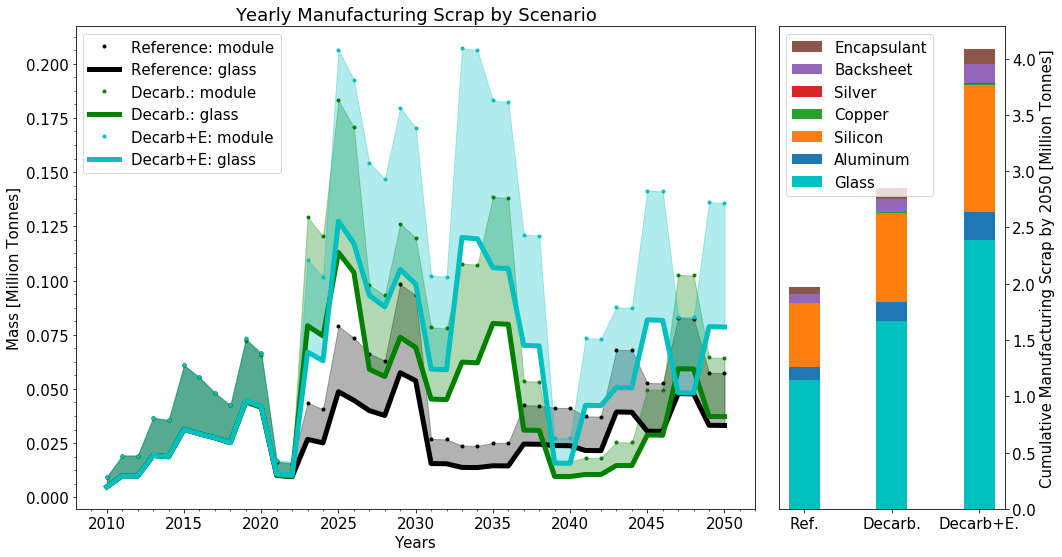

CUMULATIVE 2050 Manufacturing Scrap Material by Scenario
*************************
	 Reference:  1.97  Million Tonnes
	 Decarb:  2.85  Million Tonnes
	 Decarb+E:  4.08  Million Tonnes


In [84]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='WasteMFG_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################

foo = pd.DataFrame() 
    
# Loop over Keywords
ii = 0 
# Loop over SF Scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFscenarios[kk]
matindex = np.array(rr.scenario[obj].data['year'].tolist())
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'k.', linewidth=5, label='Reference: module')
a0.plot(matindex, glassmat, 'k', linewidth=5, label='Reference: glass')
a0.fill_between(matindex, glassmat, modulemat, color='k', alpha=0.3, interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'g.', linewidth=5, label='Decarb.: module')
a0.plot(matindex, glassmat, 'g', linewidth=5, label='Decarb.: glass')
a0.fill_between(matindex, glassmat, modulemat, color='g', alpha=0.3, interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'c.', linewidth=5, label='Decarb+E: module')
a0.plot(matindex, glassmat, 'c', linewidth=5, label='Decarb+E: glass')
a0.fill_between(matindex, glassmat, modulemat, color='c', alpha=0.3, interpolate=True)

a0.legend(loc='upper left')
a0.set_title('Yearly Manufacturing Scrap by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlabel('Years')
a0.minorticks_on()


########################    
# SUBPLOT 2
########################
#######################
# Calculate    
materials = ['glass', 'aluminium', 'silicon', 'copper', 'silver', 'encapsulant', 'backsheet']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFscenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_USA_'+obj+'_[Tonnes]'].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
dfcumulations2050['bottom5'] = dfcumulations2050['bottom4']+dfcumulations2050['silver']
dfcumulations2050['bottom6'] = dfcumulations2050['bottom5']+dfcumulations2050['encapsulant']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
p5 = a1.bar(ind, dfcumulations2050['encapsulant'], width,
             bottom=dfcumulations2050['bottom5'])
p6 = a1.bar(ind, dfcumulations2050['backsheet'], width,
             bottom=dfcumulations2050['bottom6'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative Manufacturing Scrap by 2050 [Million Tonnes]')

plt.sca(a1)
plt.xticks(range(3), ['Ref.', 'Decarb.', 'Decarb+E.'], color='black', rotation=0)
plt.tick_params(axis='y', which='minor', bottom=False)
a1.legend((p6[0], p5[0], p4[0], p3[0], p2[0], p1[0], p0[0] ), ('Encapsulant','Backsheet','Silver', 'Copper', 'Silicon','Aluminum','Glass'))

f.tight_layout()
f.savefig('PV ICE SF Figure 20 - Yearly MFG Waste by Scenario and Cumulatives_Nation.png', dpi=600)

plt.show()

print("CUMULATIVE 2050 Manufacturing Scrap Material by Scenario")
print("*************************")
print("\t Reference: ", round(UScum['WasteMFG_Module_USA_Reference.Mod_[Tonnes]'].iloc[-1]/1e6,2), ' Million Tonnes')
print("\t Decarb: ", round(UScum['WasteMFG_Module_USA_95-by-35.Adv_[Tonnes]'].iloc[-1]/1e6,2), ' Million Tonnes')
print("\t Decarb+E: ", round(UScum['WasteMFG_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]'].iloc[-1]/1e6,2), ' Million Tonnes')


# Figure 22. Annual installations and decommissions for 2020 through 2050

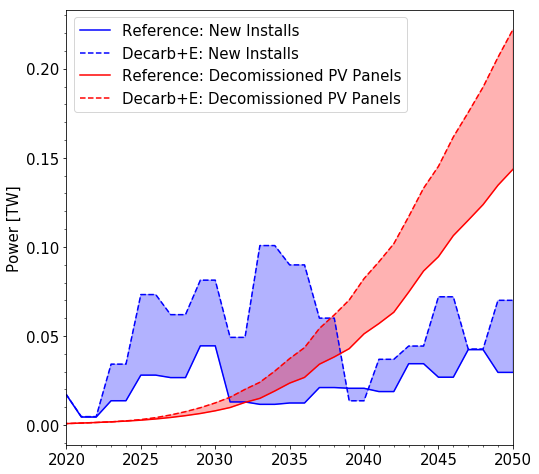

In [21]:
### SOLAR FUTURES FIGURE 20

plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(USyearly['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'b', label='Reference: New Installs')
#axs.plot(USyearly['new_Installed_Capacity_[MW]'+SFscenarios[1]]/1e6, 'b', label='Grid Decarb.: Yearly New Yearly Installs')
axs.plot(USyearly['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, 'b--', label='Decarb+E: New Installs')
axs.fill_between(rr.scenario[obj].data['year'], USyearly['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6,
                 USyearly['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, color='b', alpha=0.3,
                 interpolate=True)


axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'r', label='Reference: Decomissioned PV Panels')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, 'r--', label='Decarb+E: Decomissioned PV Panels')
axs.fill_between(rr.scenario[obj].data['year'], UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-
                 USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6,
                UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, color='r', alpha=0.3,
                 interpolate=True)
axs.minorticks_on()


axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
fig.savefig('PV ICE Figure 22 - New Installs vs Decomisions', dpi=600)
plt.show()

## Figure 23. Yearly virgin material demands and EOL silver, aluminum, and silicon, with right axis showing the fraction of Decarb+E scenario demand that could be supplied by the EOL material 

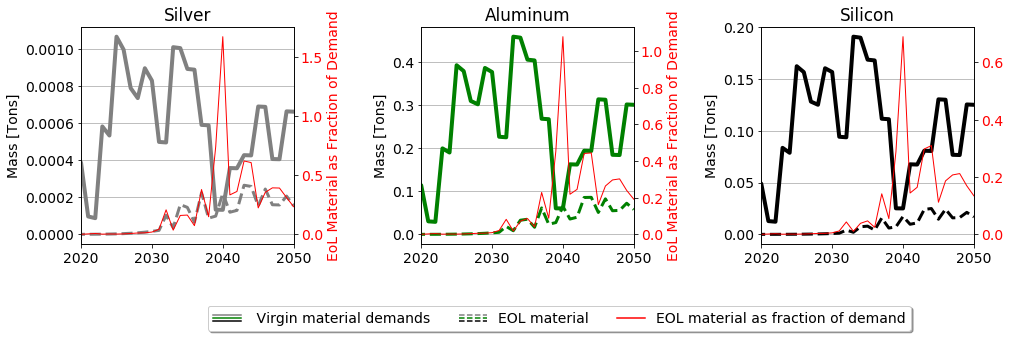

In [22]:
from matplotlib.legend_handler import HandlerBase

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (12, 8)

class AnyObjectHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        
        if orig_handle[0] is 'r':
            l1 = plt.Line2D([x0,y0+width], [0.4*height,0.4*height], color=orig_handle[0])
            return [l1]

        else:

            l1 = plt.Line2D([x0,y0+width], [0.7*height,0.7*height], color=orig_handle[0], linestyle = orig_handle[3],)
            l2 = plt.Line2D([x0,y0+width], [0.4*height,0.4*height], color=orig_handle[1], linestyle = orig_handle[4])
            l3 = plt.Line2D([x0,y0+width], [0.1*height,0.1*height], color=orig_handle[2], linestyle = orig_handle[5])
        
        return [l1, l2, l3]

    
    
fig, axs = plt.subplots(1,3, figsize=(16, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.6)
axs = axs.ravel()

# PLOT 1
i = 0
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='gray', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='gray', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Silver')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/
                USyearly['VirginStock_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')
ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
#axs[0].legend(lns, labs, loc=0)

# PLOT 2
i = 1
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='g', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='g', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Aluminum')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/
                USyearly['VirginStock_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')

ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
#axs[1].legend(lns, labs, loc=0)



# PLOT 3
i = 2
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='k', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='k', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Silicon')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/
                USyearly['VirginStock_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='EOl Material as fraction of Demand')

#ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
#axs[2].legend(lns, labs, loc='upper center', bbox_to_anchor=(-0.95, -0.25),
#          fancybox=True, shadow=True, ncol=5) 

#axs[2].legend([("gray","g","k","-","-","-"), ("gray","g","k","--","--","--"),("r","r","r","-","-","-")], ['Material Demands', "EoL Material", 'Fraction'],
#           handler_map={tuple: AnyObjectHandler()}, loc='upper center', bbox_to_anchor=(-0.95, -0.25),
#          fancybox=True, shadow=True, ncol=5)

axs[2].legend([("gray","g","k","-","-","-"), ("gray","g","k","--","--","--"),("r","r","r")], [' Virgin material demands', "EOL material", 'EOL material as fraction of demand'],
           handler_map={tuple: AnyObjectHandler()}, loc='upper center', bbox_to_anchor=(-0.95, -0.25),
          fancybox=True, shadow=True, ncol=5)

fig.savefig('PV ICE Fig 23 VirginvsWaste_Fraction_Nation.png', bbox_inches = "tight", dpi=600)

In [23]:
# Data Jarett

newdf = pd.DataFrame()

newdf['Virgin material demands, Silicon, Reference'] = USyearly['VirginStock_silicon_USA_Reference.Mod_[Tonnes]']/1e6 
newdf['EOL material, Silicon, Reference'] = USyearly['WasteEOL_silicon_USA_Reference.Mod'+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silicon, Reference'] = (USyearly['WasteEOL_silicon_USA_Reference.Mod_[Tonnes]']/
                                                                USyearly['VirginStock_silicon_USA_Reference.Mod_[Tonnes]'])

newdf['Virgin material demands, Silver, Reference'] = USyearly['VirginStock_silver_USA_Reference.Mod_[Tonnes]']/1e6 
newdf['EOL material, Silver, Reference'] = USyearly['WasteEOL_silver_USA_Reference.Mod_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silver, Reference'] = (USyearly['WasteEOL_silver_USA_Reference.Mod_[Tonnes]']/
                                                    USyearly['VirginStock_silver_USA_Reference.Mod_[Tonnes]'])

newdf['Virgin material demands, Aluminum, Reference'] = USyearly['VirginStock_aluminium_USA_Reference.Mod_[Tonnes]']/1e6 
newdf['EOL material, Aluminum, Reference'] = USyearly['WasteEOL_aluminium_USA_Reference.Mod_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Aluminum, Reference'] = (USyearly['WasteEOL_aluminium_USA_Reference.Mod_[Tonnes]']/
                                                            USyearly['VirginStock_aluminium_USA_Reference.Mod_[Tonnes]'])


newdf['Virgin material demands, Silicon, Grid Decarb.'] = USyearly['VirginStock_silicon_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6 
newdf['EOL material, Silicon, Grid Decarb.'] = USyearly['WasteEOL_silicon_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silicon, Grid Decarb.'] = (USyearly['WasteEOL_silicon_USA_'+SFscenarios[1]+'_[Tonnes]']/
                                                                    USyearly['VirginStock_silicon_USA_'+SFscenarios[1]+'_[Tonnes]'])

newdf['Virgin material demands, Silver, Grid Decarb.'] = USyearly['VirginStock_silver_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6 
newdf['EOL material, Silver, Grid Decarb.'] = USyearly['WasteEOL_silver_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silver, Grid Decarb.'] = (USyearly['WasteEOL_silver_USA_'+
                                                        SFscenarios[1]+'_[Tonnes]']/USyearly['VirginStock_silver_USA_'+SFscenarios[1]+'_[Tonnes]'])

newdf['Virgin material demands, Aluminum, Grid Decarb.'] = USyearly['VirginStock_aluminium_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6 
newdf['EOL material, Aluminum, Grid Decarb.'] = USyearly['WasteEOL_aluminium_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Aluminum, Grid Decarb.'] = (USyearly['WasteEOL_aluminium_USA_'+SFscenarios[1]+'_[Tonnes]']/
                                                                    USyearly['VirginStock_aluminium_USA_'+SFscenarios[1]+'_[Tonnes]'])


newdf['Virgin material demands, Silicon, High Elec.'] = USyearly['VirginStock_silicon_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6 
newdf['EOL material, Silicon, High Elec.'] = USyearly['WasteEOL_silicon_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silicon, High Elec.'] = (USyearly['WasteEOL_silicon_USA_'+SFscenarios[2]+'_[Tonnes]']/
                                                    USyearly['VirginStock_silicon_USA_'+SFscenarios[2]+'_[Tonnes]'])

newdf['Virgin material demands, Silver, High Elec.'] = USyearly['VirginStock_silver_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6 
newdf['EOL material, Silver, High Elec.'] = USyearly['WasteEOL_silver_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silver, High Elec.'] = (USyearly['WasteEOL_silver_USA_'+SFscenarios[2]+'_[Tonnes]']/
                                                            USyearly['VirginStock_silver_USA_'+SFscenarios[2]+'_[Tonnes]'])

newdf['Virgin material demands, Aluminum, High Elec.'] = USyearly['VirginStock_aluminium_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6 
newdf['EOL material, Aluminum, High Elec.'] = USyearly['WasteEOL_aluminium_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Aluminum, High Elec.'] = (USyearly['WasteEOL_aluminium_USA_'+SFscenarios[2]+'_[Tonnes]']/
                                                                    USyearly['VirginStock_aluminium_USA_'+SFscenarios[2]+'_[Tonnes]'])

newdf.to_csv('PV ICE Demand vs EOL Fraction NATION.csv')


# Conclusion Calculations

A benchmark global projection of PV EOL materials estimated approximately 80 million metric tonnes cumulatively by 2050 based on projections for deployment from 2014-6 (IEA/IRENA, 2016). We find that because of the significantly higher deployment projections in the SFS Decarbonization with Electrification scenario, EOL materials from PV modules just in the US is projected to reach 25% more than the prior global projection, with estimates herein at more than 100 million metric tonnes produced cumulatively by 2050. This amount of EOL PV modules are equivalent to covering the state of Delaware twice over, if laid width-to-width, would circle the Earth over 700 times, stacked on top of each other would climb to a height of 22,000 Mt. Everests, and fill over 170,000 Olympic sized swimming pools. At the time, IEA/IRENA estimated the value of materials in the cumulative EOL PV modules to be $15 billion, and could provide enough raw materials to produce approximately 2 billion new PV modules if recovered in closed loop recycling (equivalent to 630 GW of capacity) (IEA/IRENA, 2016). Our projection of cumulative EOL materials in PV modules in the US can be put into perspective with global electronic waste (e-waste), of which PV is a category, albeit a nonexistent one even 5 years ago. Cumulative U.S. PV module EOL materials by 2050 are approximately the same as annual global e-waste in 2050, or ~7% on an annual basis (in 2050), which is projected to reach 111 million metric tonnes per year.286

In [24]:
keyword='Cumulative_Area_disposed'

USyearly_Areadisp=pd.DataFrame()

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFscenarios[kk]
    # Loop over Materials
    foo = rr.scenario[obj].data[keyword].copy()
    USyearly_Areadisp["Areadisp_"+obj] = foo

    # Loop over STATEs
    #for jj in range (1, len(STATEs)): 
     #   USyearly_Areadisp["Areadisp_"+obj] += rr.scenario[obj].data[keyword]



In [25]:
UScum_Areadisp = USyearly_Areadisp.copy()
UScum_Areadisp = UScum_Areadisp.cumsum()

In [26]:
A = UScum['WasteAll_Module_USA_Reference.Mod_[Tonnes]'].iloc[-1]
#47700000 # tonnes cumulative by 2050
A = A*1000 # convert to kg
A = A/10.05599 # convert to m2 if each m2 is ~avg 10 kg
#A = A*2 # convert to area if each module is ~2 m2
A = A/1e6 # Convert to km 2
print(A)

866.7206834996188


In [27]:
B = UScum['WasteAll_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]'].iloc[-1]
#47700000 # tonnes cumulative by 2050
B = B*1000 # convert to kg
B= B/10.05599 # convert to m2 if each m2 is ~avg 10 kg
#A = A*2 # convert to area if each module is ~2 m2
B =B/1e6 # Convert to km 2
print(B)

1125.7863376263997


In [28]:
C = UScum_Areadisp['Areadisp_Reference.Mod'].iloc[-1]/1e6
D = UScum_Areadisp['Areadisp_95-by-35_Elec.Adv_DR'].iloc[-1]/1e6

# Sizes for Comparisons

In [29]:
area = 0.002 # km2 area of 1 module,  aka 2m2
width=0.001 # km  widht of a pv module, aka 1 m.
thickness = 0.0004 # km thickness of module, aka 4 cm

manhattans = 59.103529 # km2
delawares = 5133 # km2
Earthdiam = 12742  #km
swimpoololympiclength = 0.050  #km
swimpoololympicvolume = 0.050*0.025*0.002  #km3
everestheight = 8.849 # km



### Overall Results

In [30]:
print("Reference Cumulative Area by 2050 of Waste PV Modules EoL", round(C), " km^2")
print("High Electrification Cumulative Area by 2050 of Waste PV Modules EoL", round(D), " km^2")

print("")
print("Reference Cumulative LENGTH by 2050 of Waste PV Modules EoL", round(C)/width, " km")
print("High Electrification Cumulative LENGTH by 2050 of Waste PV Modules EoL", round(D)/width, " km")

print("")
print("Reference Cumulative VOLUME by 2050 of Waste PV Modules EoL", round(C)*thickness, " km3")
print("High Electrification Cumulative VOLUME by 2050 of Waste PV Modules EoL", round(D)*thickness, " km3")

print("")
print("Reference Cumulative # of Modules by 2050 of Waste PV Modules EoL", round(C)/area, " Modules")
print("High Electrification Cumulative # of Modules by 2050 of Waste PV Modules EoL", round(D)/area, " Modules")

print("")
print("")
print ("MFG SCrap + Eol Waste")
print("Reference Cumulative Area by 2050 of Waste PV Mfg + Modules EoL", round(A), " km^2")
print("High Electrification Cumulative Area by 2050 of Waste PV Mfg + Modules EoL", round(B), " km^2")


Reference Cumulative Area by 2050 of Waste PV Modules EoL 584.0  km^2
High Electrification Cumulative Area by 2050 of Waste PV Modules EoL 627.0  km^2

Reference Cumulative LENGTH by 2050 of Waste PV Modules EoL 584000.0  km
High Electrification Cumulative LENGTH by 2050 of Waste PV Modules EoL 627000.0  km

Reference Cumulative VOLUME by 2050 of Waste PV Modules EoL 0.2336  km3
High Electrification Cumulative VOLUME by 2050 of Waste PV Modules EoL 0.2508  km3

Reference Cumulative # of Modules by 2050 of Waste PV Modules EoL 292000.0  Modules
High Electrification Cumulative # of Modules by 2050 of Waste PV Modules EoL 313500.0  Modules


MFG SCrap + Eol Waste
Reference Cumulative Area by 2050 of Waste PV Mfg + Modules EoL 867.0  km^2
High Electrification Cumulative Area by 2050 of Waste PV Mfg + Modules EoL 1126.0  km^2


### Overall Comparisons


## Delaware Areas

In [31]:
print("Reference Waste equals ", round(C/manhattans), " Manhattans Area ")
print("High Electrification equals ", round(D/manhattans), " Manhattans Area ")

print("")
print("Reference Waste equals ", round(C/delawares,2), " Delawares Area")
print("High Electrification equals ", round(D/delawares,2), " Delawares Area ")

## Olympic sized swimming pool Lenghts (stacked)
print("")
print("Reference Waste equals ", round(C/width/Earthdiam,2), " Earths, laid Width-to-Width ")
print("High Electrification equals ", round(D/width/Earthdiam,2), " Earths, laid Width-to-Width ")

## Olympic sized swimming pool Lenghts (stacked)
print("")
print("Reference Waste equals ", round(C*thickness/area/swimpoololympiclength,2), " Olympic Swimming Pool Lengths, STACKED ")
print("High Electrification equals ", round(D*thickness/area/swimpoololympiclength,2), " Olympic Swimming Pool Lengths, STACKED ")

## Olympic sized swimming pool Volumnes
print("")
print("Reference Waste equals ", round(C*thickness/swimpoololympicvolume,2), " Olympic Swimming Pool Volumes ")
print("High Electrification equals ", round(D*thickness/swimpoololympicvolume,2), " Olympic Swimming Pool Volumes ")

# EVERESTS Stacked on top of each other???
print("")
print("Reference Waste equals ", round(C*thickness/area/everestheight,2), " Everests Lengths, STACKED")
print("High Electrification equals ", round(D*thickness/area/everestheight,2), " Everests Lengths, STACKED")


Reference Waste equals  10.0  Manhattans Area 
High Electrification equals  11.0  Manhattans Area 

Reference Waste equals  0.11  Delawares Area
High Electrification equals  0.12  Delawares Area 

Reference Waste equals  45.86  Earths, laid Width-to-Width 
High Electrification equals  49.18  Earths, laid Width-to-Width 

Reference Waste equals  2337.58  Olympic Swimming Pool Lengths, STACKED 
High Electrification equals  2506.67  Olympic Swimming Pool Lengths, STACKED 

Reference Waste equals  93503.32  Olympic Swimming Pool Volumes 
High Electrification equals  100266.96  Olympic Swimming Pool Volumes 

Reference Waste equals  13.21  Everests Lengths, STACKED
High Electrification equals  14.16  Everests Lengths, STACKED


# APENDIX

## Table B - 2. Comparison of 2030 Installed PV Mass, with Material Breakdown, Between CSA Group’s Recent 2030 Material Demands Projection and PViCE + ReEDS Projections

In [32]:
names = ['USA_Reference.Mod', 'USA_95-by-35.Adv', 'USA_95-by-35_Elec.Adv_DR']
materials = ['Module', 'glass', 'encapsulant', 'backsheet', 'aluminium', 'copper', 'silicon', 'silver']

tableapp=[]
for name in names:
    colapp=[]
    for mat in materials:
         colapp.append(round((UScum.filter(regex='VirginStock_'+mat+'_'+name).loc[2030][0]-
                       UScum.filter(regex='WasteAll_'+mat+'_'+name).loc[2030][0])/100,0)*100)
    tableapp.append(colapp)
    
df= pd.DataFrame(tableapp, columns = materials, index=names)
df = df.T
df

,USA_Reference.Mod,USA_95-by-35.Adv,USA_95-by-35_Elec.Adv_DR
Module,17537200.0,26735100.0,31664800.0
glass,13385200.0,20509400.0,24396800.0
encapsulant,1178000.0,1785700.0,2090900.0
backsheet,574900.0,861800.0,1000300.0
aluminium,1848600.0,2755600.0,3213700.0
copper,11200.0,17500.0,20600.0
silicon,534600.0,798500.0,935000.0
silver,4600.0,6600.0,7500.0


In [33]:
print("Table 7 Effective Capacity PV ICE, Reference: ", round(USyearly['Capacity_USA_Reference.Mod_[MW]'].loc[2030]/1000,1))
print("Table 7 Effective Capacity PV ICE, Decarb.: ", round(USyearly['Capacity_USA_95-by-35.Adv_[MW]'].loc[2030]/1000,1))
print("Table 7 Effective Capacity PV ICE, Decarb+E: ", round(USyearly['Capacity_USA_95-by-35_Elec.Adv_DR_[MW]'].loc[2030]/1000,1))


Table 7 Effective Capacity PV ICE, Reference:  314.0
Table 7 Effective Capacity PV ICE, Decarb.:  488.1
Table 7 Effective Capacity PV ICE, Decarb+E:  586.2


## Table B - 4. Comparison of Cumulative U.S. EOL Material for Various Years

In [35]:
UScum.filter(regex='WasteEOL_Module').loc[2050]

WasteEOL_Module_USA_Reference.Mod_[Tonnes]                  6.744805e+06
WasteEOL_Module_USA_95-by-35.Adv_[Tonnes]                   7.238586e+06
WasteEOL_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]           7.236932e+06
WasteEOL_Module_PerfectMFG_Reference.Mod_[Tonnes]           6.744805e+06
WasteEOL_Module_PerfectMFG_95-by-35.Adv_[Tonnes]            7.238586e+06
WasteEOL_Module_PerfectMFG_95-by-35_Elec.Adv_DR_[Tonnes]    7.236932e+06
WasteEOL_Module_IrenaEL_Reference.Mod_[Tonnes]              1.017606e+07
WasteEOL_Module_IrenaEL_95-by-35.Adv_[Tonnes]               1.641228e+07
WasteEOL_Module_IrenaEL_95-by-35_Elec.Adv_DR_[Tonnes]       2.028782e+07
WasteEOL_Module_IrenaRL_Reference.Mod_[Tonnes]              7.451554e+06
WasteEOL_Module_IrenaRL_95-by-35.Adv_[Tonnes]               1.052673e+07
WasteEOL_Module_IrenaRL_95-by-35_Elec.Adv_DR_[Tonnes]       1.161400e+07
Name: 2050, dtype: float64

In [36]:
#names2 = ['IrenaEL_Reference.Mod', 'IrenaEL_95-by-35.Adv', 'IrenaEL_95-by-35_Elec.Adv_DR']
#names3 = ['IrenaRL_Reference.Mod', 'IrenaRL_95-by-35.Adv', 'IrenaRL_95-by-35_Elec.Adv_DR']
#names = ['USA_Reference.Mod', 'USA_95-by-35.Adv', 'USA_95-by-35_Elec.Adv_DR']

names2 = ['IrenaEL_Reference.Mod', 'IrenaRL_Reference.Mod','USA_Reference.Mod']
names3 = ['IrenaEL_95-by-35.Adv', 'IrenaRL_95-by-35.Adv', 'USA_95-by-35.Adv']
names = ['IrenaEL_95-by-35_Elec.Adv_', 'IrenaRL_95-by-35_Elec.Adv_DR', 'USA_95-by-35_Elec.Adv_DR']

In [37]:
pd.options.display.float_format = '{:20,.2f}'.format

In [38]:
yearlosslist=['2016_Early Loss', '2016_Regular Loss', '2016_PV_ICE',
 '2020_Early Loss', '2020_Regular Loss', '2020_PV_ICE',
 '2030_Early Loss', '2030_Regular Loss', '2030_PV_ICE',
 '2040_Early Loss', '2040_Regular Loss', '2040_PV_ICE',
 '2050_Early Loss', '2050_Regular Loss', '2050_PV_ICE']

In [40]:
print("Figure 12 - Cumulative EOL Material 2016, 2020, 2030, 240, 2050")

lossmethod=['PV_ICE', 'Early Loss', 'Regular Loss']
years = [2016, 2020, 2030, 2040, 2050]
tableapp=[]
scenapp = pd.DataFrame()
colapp1=[]
colapp2=[]
colapp3=[]
for year in years:
    for name in range(0,len(names)):
        colapp1.append(round(UScum.filter(regex='WasteEOL_Module_'+names2[name]).loc[year][0],0))
        colapp2.append(round(UScum.filter(regex='WasteEOL_Module_'+names3[name]).loc[year][0],0))
        colapp3.append(round(UScum.filter(regex='WasteEOL_Module_'+names[name]).loc[year][0] ,0))

results = {'Ref': colapp1, 'Decarb': colapp2, 'DecarbE': colapp3}
asdf = pd.DataFrame(results)
asdf['cat']=yearlosslist
asdf.set_index('cat', inplace=True)
asdf['Irena 2016 Lit'] = [24000, 6500,0, 85000,13000,0, 1000000,170000,0,4000000,1700000,0,10000000,7500000,0]
asdf['CSA 2020 Lit'] = [0, 0, 0, 0,0,0, 1200000, 214900,0, 0, 0,0, 0,0,0]

asdf

Figure 12 - Cumulative EOL Material 2016, 2020, 2030, 240, 2050


,Ref,Decarb,DecarbE,Irena 2016 Lit,CSA 2020 Lit
cat,,,,,
2016_Early Loss,"6,950.00","6,950.00","6,950.00",24000,0
2016_Regular Loss,35.00,35.00,35.00,6500,0
2016_PV_ICE,10.00,10.00,10.00,0,0
2020_Early Loss,"52,796.00","52,794.00","52,797.00",85000,0
2020_Regular Loss,987.00,987.00,987.00,13000,0
2020_PV_ICE,409.00,409.00,409.00,0,0
2030_Early Loss,"820,797.00","920,410.00","921,590.00",1000000,1200000
2030_Regular Loss,"112,002.00","112,939.00","112,917.00",170000,214900
2030_PV_ICE,"71,088.00","71,084.00","71,095.00",0,0


# U.S. Annual Demand by Material for Select Years (metric tons)

In [41]:
names = ['USA_Reference.Mod', 'USA_95-by-35.Adv', 'USA_95-by-35_Elec.Adv_DR']
materials = ['glass', 'aluminium', 'copper','silicon', 'silver', 'encapsulant','backsheet']
mat = materials[0]
scen=names[0]

In [68]:
L1 = [2030,2040,2050]

Glass = USyearly.filter(regex='VirginStock_'+materials[0]+'_USA').loc[L1]
Al = USyearly.filter(regex='VirginStock_'+materials[1]+'_USA').loc[L1]
Cu = USyearly.filter(regex='VirginStock_'+materials[2]+'_USA').loc[L1]
Si = USyearly.filter(regex='VirginStock_'+materials[3]+'_USA').loc[L1]
Ag = USyearly.filter(regex='VirginStock_'+materials[4]+'_USA').loc[L1]
Encap = USyearly.filter(regex='VirginStock_'+materials[5]+'_USA').loc[L1]
Backsheet = USyearly.filter(regex='VirginStock_'+materials[6]+'_USA').loc[L1]

Glass.columns = newcolnames
Al.columns = newcolnames
Cu.columns = newcolnames
Si.columns = newcolnames
Ag.columns = newcolnames
Encap.columns = newcolnames
Backsheet.columns = newcolnames

frames = [Glass, Al, Cu, Si, Ag, Encap, Backsheet]
df = pd.concat(frames, keys=materials)
df

Reference               Decarb  \
            year                                             
glass       2030         1,805,498.45         2,319,543.75   
            2040           799,385.82           322,337.07   
            2050         1,112,549.39         1,249,126.61   
aluminium   2030           205,677.97           264,236.76   
            2040            91,064.08            36,719.85   
            2050           126,738.91           142,297.45   
copper      2030             1,484.23             1,906.81   
            2040               657.14               264.98   
            2050               914.58             1,026.86   
silicon     2030            85,658.54           110,046.47   
            2040            37,925.39            15,292.69   
            2050            52,782.85            59,262.51   
silver      2030               452.80               581.71   
            2040               200.48                80.84   
            2050               279.01               313.27   
encapsulant 2030           139,994.53           179,852.52   
            2040            61,972.10            24,989.06   
            2050            86,249.99            96,838.09   
backsheet   2030            60,216.66            77,361.00   
            2040            25,143.07            10,138.46   
            2050            34,993.00            39,288.76   

                             Dercab+E  
            year                       
glass       2030         3,302,174.01  
            2040           527,631.13  
            2050         2,635,651.26  
aluminium   2030           376,175.60  
            2040            60,106.45  
            2050           300,246.95  
copper      2030             2,714.59  
            2040               433.75  
            2050             2,166.67  
silicon     2030           156,665.55  
            2040            25,032.49  
            2050           125,043.61  
silver      2030               828.15  
            2040               132.32  
            2050               660.99  
encapsulant 2030           256,043.59  
            2040            40,904.41  
            2050           204,327.91  
backsheet   2030           110,133.51  
            2040            16,595.57  
            2050            82,899.09

In [69]:
L1 = [2030,2040,2050]

Glass = UScum.filter(regex='VirginStock_'+materials[0]+'_USA').loc[L1]
Al = UScum.filter(regex='VirginStock_'+materials[1]+'_USA').loc[L1]
Cu = UScum.filter(regex='VirginStock_'+materials[2]+'_USA').loc[L1]
Si = UScum.filter(regex='VirginStock_'+materials[3]+'_USA').loc[L1]
Ag = UScum.filter(regex='VirginStock_'+materials[4]+'_USA').loc[L1]
Encap = UScum.filter(regex='VirginStock_'+materials[5]+'_USA').loc[L1]
Backsheet = UScum.filter(regex='VirginStock_'+materials[6]+'_USA').loc[L1]

Glass.columns = newcolnames
Al.columns = newcolnames
Cu.columns = newcolnames
Si.columns = newcolnames
Ag.columns = newcolnames
Encap.columns = newcolnames
Backsheet.columns = newcolnames

frames = [Glass, Al, Cu, Si, Ag, Encap, Backsheet]
df = pd.concat(frames, keys=materials)
df

Reference               Decarb  \
            year                                             
glass       2030        14,051,022.94        21,468,337.92   
            2040        20,242,130.59        36,768,364.49   
            2050        31,807,683.78        46,864,919.53   
aluminium   2030         1,916,942.72         2,851,825.73   
            2040         2,622,218.59         4,594,767.39   
            2050         3,939,738.16         5,744,942.28   
copper      2030            12,735.62            19,887.10   
            2040            17,825.09            32,464.66   
            2050            27,332.69            40,764.66   
silicon     2030           847,461.56         1,235,757.83   
            2040         1,141,187.24         1,961,639.37   
            2050         1,689,893.58         2,440,651.80   
silver      2030             5,968.79             8,454.32   
            2040             7,521.44            12,291.38   
            2050            10,421.94            14,823.47   
encapsulant 2030         1,219,601.95         1,845,949.50   
            2040         1,699,565.33         3,032,078.54   
            2050         2,596,180.66         3,814,810.32   
backsheet   2030           610,668.70           914,018.61   
            2040           805,397.50         1,395,250.08   
            2050         1,169,168.64         1,712,816.85   

                             Dercab+E  
            year                       
glass       2030        25,488,624.58  
            2040        50,314,207.83  
            2050        70,552,093.00  
aluminium   2030         3,323,940.67  
            2040         6,152,010.48  
            2050         8,457,460.93  
copper      2030            23,409.75  
            2040            43,817.91  
            2050            60,454.71  
silicon     2030         1,431,754.63  
            2040         2,609,558.64  
            2050         3,569,707.77  
silver      2030             9,573.77  
            2040            15,799.72  
            2050            20,875.14  
encapsulant 2030         2,160,533.97  
            2040         4,085,128.35  
            2050         5,654,063.08  
backsheet   2030         1,060,517.27  
            2040         1,841,355.91  
            2050         2,477,897.76

# OTHER PLOTS / DATA NOT USED YET

## Yearly Virgin Material Needs by Scenario

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################

foo = pd.DataFrame() 
    
# Loop over Keywords
ii = 0 
# Loop over SF Scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFscenarios[kk]
matindex = np.array(rr.scenario[obj].data['year'].tolist())
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'k.', linewidth=5, label='Reference: module')
a0.plot(matindex, glassmat, 'k', linewidth=5, label='Reference: glass')
a0.fill_between(matindex, glassmat, modulemat, color='k', alpha=0.3, interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'g.', linewidth=5, label='Decarb.: module')
a0.plot(matindex, glassmat, 'g', linewidth=5, label='Decarb.: glass')
a0.fill_between(matindex, glassmat, modulemat, color='g', alpha=0.3, interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'c.', linewidth=5, label='Decarb+E: module')
a0.plot(matindex, glassmat, 'c', linewidth=5, label='Decarb+E: glass')
a0.fill_between(matindex, glassmat, modulemat, color='c', alpha=0.3, interpolate=True)

a0.legend(loc='upper left')
a0.set_title('Yearly Virgin Material Needs by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlabel('Years')
a0.minorticks_on()


########################    
# SUBPLOT 2
########################
#######################
# Calculate    
materials = ['glass', 'aluminium', 'silicon', 'copper', 'silver', 'encapsulant', 'backsheet']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFscenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_USA_'+obj+'_[Tonnes]'].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
dfcumulations2050['bottom5'] = dfcumulations2050['bottom4']+dfcumulations2050['silver']
dfcumulations2050['bottom6'] = dfcumulations2050['bottom5']+dfcumulations2050['encapsulant']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
p5 = a1.bar(ind, dfcumulations2050['encapsulant'], width,
             bottom=dfcumulations2050['bottom5'])
p6 = a1.bar(ind, dfcumulations2050['backsheet'], width,
             bottom=dfcumulations2050['bottom6'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050 [Million Tonnes]')

plt.sca(a1)
plt.xticks(range(3), ['Ref.', 'Decarb.', 'Decarb+E.'], color='black', rotation=0)
plt.tick_params(axis='y', which='minor', bottom=False)
a1.legend((p6[0], p5[0], p4[0], p3[0], p2[0], p1[0], p0[0] ), ('Encapsulant','Backsheet','Silver', 'Copper', 'Silicon','Aluminum','Glass'))

f.tight_layout()
f.savefig('PV ICE SF Figure 3 - Yearly Virgin Material Needs by Scenario and Cumulatives.png', dpi=600)
plt.show()


In [ ]:
rr.scenario['Referaence.Mod'].material['glass'].materialdata['mat_Virgin_Stock'].tail(5)

# Save Data for Jarett Zuboy

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6-UScum['newInstalledCapacity_USA_'+SFscenarios[1]+'_[MW]']/1e6, 'k', label='Cumulative New Yearly Installs S3-S2')

#axs.plot(UScum['new_Installed_Capacity_[MW]'+SFscenarios[2]]/1e6, 'c', label='Cumulative New Yearly Installs')

axs.legend()
axs.set_xlim([2020,2030])
axs.set_ylabel('Power [TW]')
fig.savefig(title_Method+' Fig_New_Installs_vs_InstalledCapacity_vs_Waste', dpi=600)
plt.show()

# WASTE COMPARISON SIZE

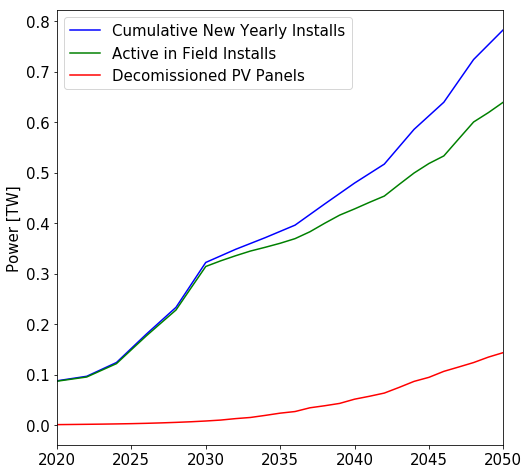

In [75]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'b', label='Cumulative New Yearly Installs')
axs.plot(USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'g', label='Active in Field Installs')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-
         USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'r', label='Decomissioned PV Panels')
axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
fig.savefig('PV ICE Fig_New_Installs_vs_InstalledCapacity_vs_Waste', dpi=600)
plt.show()

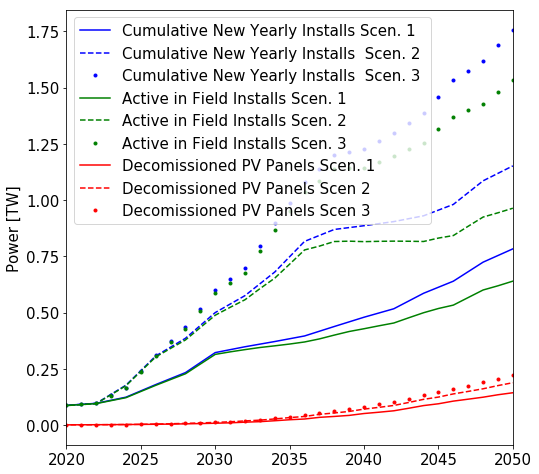

In [76]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'b', label='Cumulative New Yearly Installs Scen. 1 ')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[1]+'_[MW]']/1e6, 'b--', label='Cumulative New Yearly Installs  Scen. 2 ')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, 'b.', label='Cumulative New Yearly Installs  Scen. 3 ')
axs.plot(USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'g', label='Active in Field Installs Scen. 1')
axs.plot(USyearly['Capacity_USA_'+SFscenarios[1]+'_[MW]']/1e6, 'g--', label='Active in Field Installs Scen. 2')
axs.plot(USyearly['Capacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, 'g.', label='Active in Field Installs Scen. 3')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'r', label='Decomissioned PV Panels Scen. 1')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[1]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[1]+'_[MW]']/1e6, 'r--', label='Decomissioned PV Panels Scen 2')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, 'r.', label='Decomissioned PV Panels Scen 3')

axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
plt.show()

In [77]:
foo0 = (UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6).sum()
foo1 = (UScum['newInstalledCapacity_USA_'+SFscenarios[1]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[1]+'_[MW]']/1e6).sum()
foo2 = (UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[2]+'_[MW]']/1e6).sum()
print(foo0, foo1, foo2)

1.31125013036803 1.7524564581196613 2.0343250930748704


In [78]:
E = (UScum['newInstalledCapacity_USA_Reference.Mod_[MW]']/1e6).sum()
F = (UScum['newInstalledCapacity_USA_Reference.Mod_[MW]']/1e6-USyearly['Capacity_USA_Reference.Mod_[MW]']/1e12).sum()
print("Cumulative Installs", E)
print("Cumulative Waste", F)
print("Fraction of Decomisioned to Installed Cumulative by 2050", F/E)


Cumulative Installs 12.481579419861927
Cumulative Waste 12.481568249532636
Fraction of Decomisioned to Installed Cumulative by 2050 0.999999105054824


In [51]:
materials = ['Module', 'glass', 'aluminium', 'copper', 'silicon', 'silver', 'encapsulant', 'backsheet']

print(" Appendix Table I: Metric Tonnes Installed in field in 2030")
print(" ########################################################### \n")
#Loop over scenarios
for kk in range (0, 3):
    obj = SFscenarios[kk]
    print("SCENARIO :", obj)

    print("********************************")
    print("********************************")

    modulemat = 0
    for ii in range(0, len(materials)):
        installedmat = (UScum['VirginStock_'+materials[ii]+'_USA_'+obj+'_[Tonnes]'].loc[2030]-
              UScum['WasteAll_'+materials[ii]+'_USA_'+obj+'_[Tonnes]'].loc[2030])
        print(materials[ii], ':', round(installedmat/1000)*1000, 'tons')

    print("Capacity in Year 2030 [GW]:", round(USyearly['Capacity_USA_'+obj+'_[MW]'].loc[2030]/1e9))
    print("Capacity in Year 2050 [GW]:", round(USyearly['Capacity_USA_'+obj+'_[MW]'].loc[2050]/1e9))
    print("****************************\n")

 Appendix Table I: Metric Tonnes Installed in field in 2030
 ########################################################### 

SCENARIO : Reference.Mod
********************************
********************************
Module : 17537000.0 tons
glass : 13385000.0 tons
aluminium : 1849000.0 tons
copper : 11000.0 tons
silicon : 535000.0 tons
silver : 5000.0 tons
encapsulant : 1178000.0 tons
backsheet : 575000.0 tons
Capacity in Year 2030 [GW]: 0.0
Capacity in Year 2050 [GW]: 0.0
****************************

SCENARIO : 95-by-35.Adv
********************************
********************************
Module : 26735000.0 tons
glass : 20509000.0 tons
aluminium : 2756000.0 tons
copper : 18000.0 tons
silicon : 799000.0 tons
silver : 7000.0 tons
encapsulant : 1786000.0 tons
backsheet : 862000.0 tons
Capacity in Year 2030 [GW]: 0.0
Capacity in Year 2050 [GW]: 0.0
****************************

SCENARIO : 95-by-35_Elec.Adv_DR
********************************
********************************
Module : 31665

### New Section

VirginStock_aluminum_Reference.Mod
VirginStock_aluminum_95-by-35.Adv  
VirginStock_aluminum_95-by-35_Elec.Adv_DR 
Waste_EOL_aluminum_Reference.Mod  
Waste_EOL_aluminum_95-by-35.Adv  
Waste_EOL_aluminum_95-by-35_Elec.Adv_DR  

VirginStock_silver_Reference.Mod
VirginStock_silver_95-by-35.Adv  
VirginStock_silver_95-by-35_Elec.Adv_DR 
Waste_EOL_silver_Reference.Mod  
Waste_EOL_silver_95-by-35.Adv  
Waste_EOL_silver_95-by-35_Elec.Adv_DR  


In [ ]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (12, 8)
    
fig, axs = plt.subplots(1,3, figsize=(16, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.6)
axs = axs.ravel()

# PLOT 1
i = 0
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='gray', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='gray', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Silver')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/
                USyearly['VirginStock_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')
ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
#axs[0].legend(lns, labs, loc=0)

# PLOT 2
i = 1
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='g', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='g', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Aluminum')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/
                USyearly['VirginStock_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')

ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
#axs[1].legend(lns, labs, loc=0)



# PLOT 3
i = 2
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='k', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='k', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Silicon')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/
                USyearly['VirginStock_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')

#ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
axs[2].legend(lns, labs, loc='upper center', bbox_to_anchor=(-0.95, -0.25),
          fancybox=True, shadow=True, ncol=5)

fig.savefig(title_Method+' Fig_1x3_VirginvsWaste_Fraction_Nation.png', bbox_inches = "tight", dpi=600)